## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils (1).py


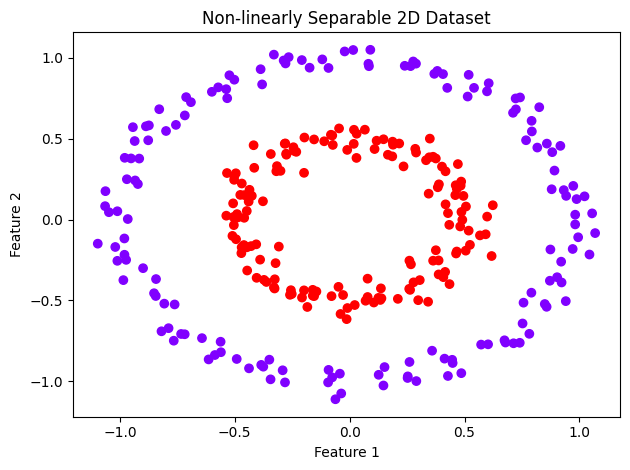

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Function to get consistent colors for plotting
def get_colors(y):
    # Map unique labels to colors
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: color for label, color in zip(unique_labels, colors)}
    return [color_map[label] for label in y]

cmap = get_colors(y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=cmap)
plt.title("Non-linearly Separable 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit.

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import SGD as SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
### YOUR CODE HERE ###

# Initialize the Sequential model
perceptron = Sequential()

# Add a Dense layer
perceptron.add(Dense(units=1, input_dim = 2, activation='sigmoid'))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy".

In [ ]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
epochs = 300
batch_size = 16

perceptron.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/300
15/15 [==============================] - 1s 5ms/step - loss: 0.7224
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7219
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7213
Epoch 4/300
15/15 [==============================] - 0s 7ms/step - loss: 0.7207
Epoch 5/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7200
Epoch 6/300
15/15 [==============================] - 0s 6ms/step - loss: 0.7195
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7188
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7183
Epoch 9/300
15/15 [==============================] - 0s 4ms/step - loss: 0.7177
Epoch 10/300
15/15 [==============================] - 0s 6ms/step - loss: 0.7171
Epoch 11/300
15/15 [==============================] - 0s 4ms/step - loss: 0.7166
Epoch 12/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7161
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by implementing your own function.

In [ ]:
y_preds = perceptron.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
### Build your own function to calculate accuracy###
def accuracy(y, y_preds):

    y_preds_binary = [1 if pred > 0.5 else 0 for pred in y_preds]
    correct_predictions = sum(y == y_preds_binary)
    accuracy = correct_predictions / len(y)

    return accuracy

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.35


57/57 [==============================] - 0s 1ms/step


Text(22.347222222222214, 0.5, 'Test')

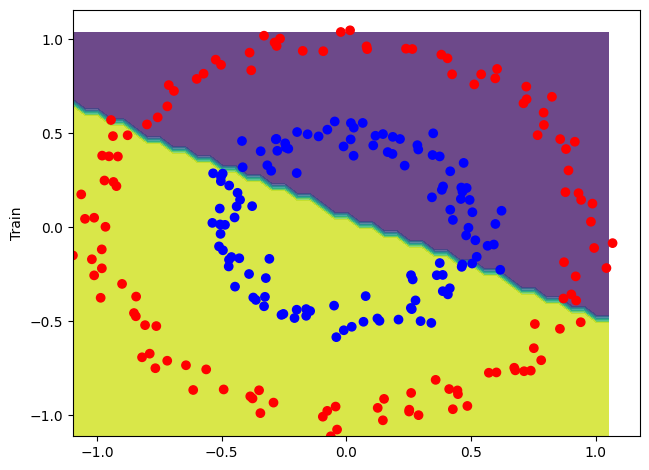

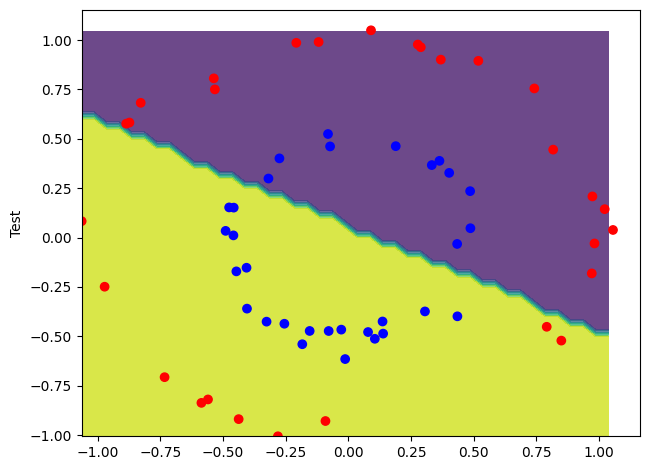

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer).

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import SGD as SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units
    model.add(Dense(units = 2, input_dim = 2, activation='relu'))

    # Add a final output layer with 1 unit
    model.add(Dense(units = 1, activation='sigmoid'))

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

    # compile the model with "binary_crossentropy" loss and SGD optimizer.
    model.compile(loss='binary_crossentropy', optimizer=sgd)

    return model

In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
epochs = 300
batch_size = 16

model_train = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/300
15/15 [==============================] - 2s 6ms/step - loss: 0.7282
Epoch 2/300
15/15 [==============================] - 0s 7ms/step - loss: 0.7267
Epoch 3/300
15/15 [==============================] - 0s 6ms/step - loss: 0.7249
Epoch 4/300
15/15 [==============================] - 0s 7ms/step - loss: 0.7231
Epoch 5/300
15/15 [==============================] - 0s 10ms/step - loss: 0.7216
Epoch 6/300
15/15 [==============================] - 0s 10ms/step - loss: 0.7198
Epoch 7/300
15/15 [==============================] - 0s 11ms/step - loss: 0.7185
Epoch 8/300
15/15 [==============================] - 0s 10ms/step - loss: 0.7174
Epoch 9/300
15/15 [==============================] - 0s 8ms/step - loss: 0.7160
Epoch 10/300
15/15 [==============================] - 0s 8ms/step - loss: 0.7150
Epoch 11/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7137
Epoch 12/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7128
Epoch 13/300
15/15 [=============

Q3. Compute accuracy by using your own function.

In [ ]:
### YOUR CODE HERE ###
y_preds = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.6666666666666666


57/57 [==============================] - 0s 2ms/step


Text(22.347222222222214, 0.5, 'Test')

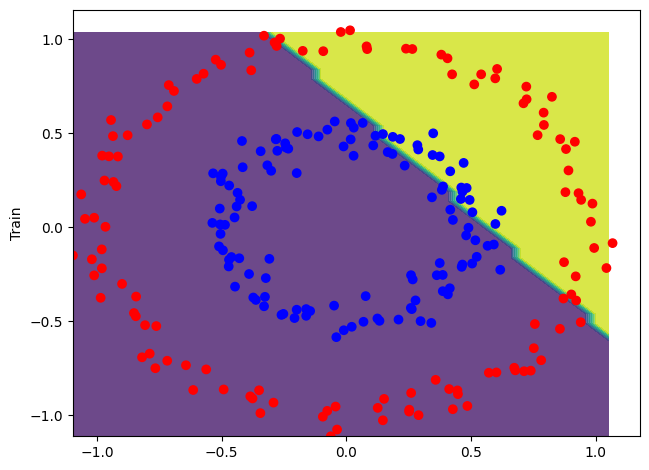

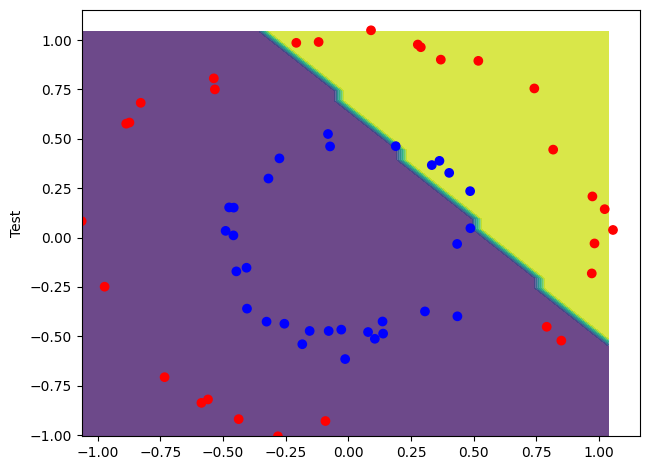

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding".

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.optimizers.legacy import SGD as SGD
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)
y_test_vectorized = to_categorical(y_test)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]


The one hot encoded vectors will serve as future labels for our models.

# Exercise 3:

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2.


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    model.add(Dense(units = 10, input_dim=2, activation='relu'))

    # second hidden layer with 5 units and 'relu' activation function
    model.add(Dense(units = 5, activation='relu'))

    # output layer with 2 units and 'softmax' activation function
    model.add(Dense(units = 2, activation='softmax'))

    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)
    model.compile(loss='categorical_crossentropy', optimizer=sgd)

    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
epochs = 300
batch_size = 16

model.fit(X_train, y_train_vectorized, epochs=epochs, batch_size=batch_size)

Epoch 1/300
15/15 [==============================] - 1s 3ms/step - loss: 0.7913
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7791
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7680
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7581
Epoch 5/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7512
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7450
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7348
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7219
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7174
Epoch 10/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7156
Epoch 11/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7147
Epoch 12/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7137
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by using your own function

In [ ]:
y_preds = model.predict(X_test)
print(f'The accuracy is: {accuracy(y_test_vectorized.argmax(axis=1), y_preds.argmax(axis=1))}')

2/2 [==============================] - 0s 5ms/step
The accuracy is: 0.9833333333333333


57/57 [==============================] - 0s 2ms/step


Text(22.347222222222214, 0.5, 'Test')

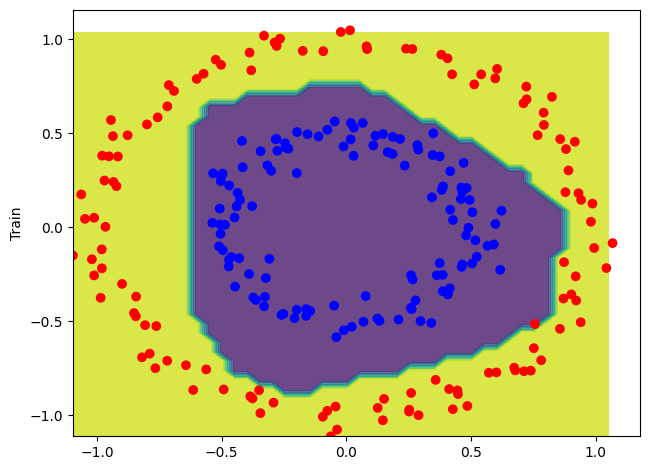

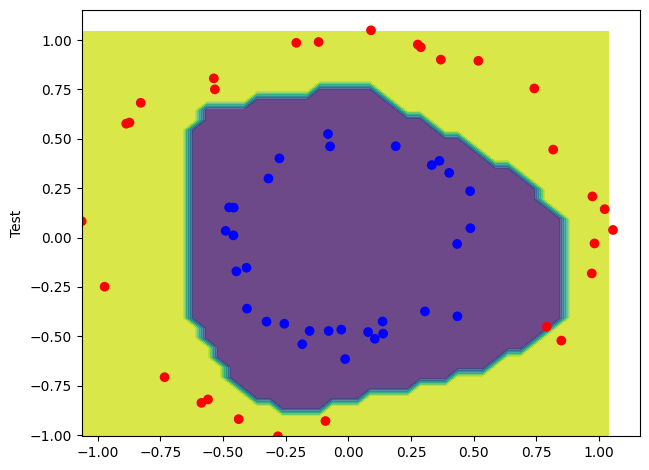

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions
\lb remove this

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans- If we choose too high a learning rate for GD, the optimization process might find it difficult to converge. Since the weight corrections are scaled by a factor of the learning rate, too high values of learning rate can cause the algorithm to miss the minimum values and oscillate or even diverge. With full batch GD, the entire dataset is used and a high learning rate with this might lead to drastic updates in the model parameter, thus delaying or failing convergence.

If we choose high learning rate for SGD (where only a subset of data is used to calculate gradient in each step), the weight updates can be too erratic and unstable, causing the optimization process to miss the local minimum. This effect is relatively less in full GD where the size of the dataset might smooth out the erratic updates, thus making the optimization more stable even with a high learning rate.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans- A data augmentation method that is helpful for classifying images of dogs and cats but not for classifynig handwritten signal can be a rotational augumentation (small rotation like 10-15 degrees) or a horizontal flipping augmentation (mirror image). Both of these augmentations maintain the contextual implication of cat/dog image since cats and dogs do appear in different orientations and mirroring their images maintain the facial or body features. Handwritten digits on the other hand lose their contextual meaning on rotation or mirroring. Askew and mirrored images of numbers can alter the meaning and make interpretation and classification difficult.

Q3. Suppose we have the following two neural networks containing fully-connected layers only.
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans- Network A is more simplistic, which makes it computationally less expensive. Since it has lesser parameters, it can alse be trained on relatively less amount of data.

Network B is more complex and the presence of a hidden layer provides  opportunities to introduce non-linearity in the model. This makes it more effective in recognising more intricate relationships between the input and output. It can potentially learn more complex and hierarchical representations of the input data.

# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records.

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/>
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
### YOUR CODE HERE ###
# Load your training data set
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('CreditDefault_training.csv')

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
testing = pd.read_csv('CreditDefault_Xtest.csv')

In [ ]:
cat_var =['SEX', 'EDUCATION', 'MARRIAGE']
pay_var =[ 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
num_var =['LIMIT_BAL','AGE', 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Define the categories for each column in pay_var
# Here, each column in pay_var is assumed to have the same range of categories
categories = [np.arange(-2, 10)] * len(pay_var)

# Instantiate the OneHotEncoder with the defined categories
encoder = OneHotEncoder(categories=categories, sparse=False)

# Fit and transform the selected columns
encoded_data = encoder.fit_transform(X[pay_var])
encoder_data_test =encoder.transform(testing[pay_var])
encoded_df_pay = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
encoded_df_pay_test = pd.DataFrame(encoder_data_test, columns=encoder.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoder = OneHotEncoder( sparse=False)
encoded_data = encoder.fit_transform(X[cat_var])
encoded_data_test =encoder.transform(testing[cat_var])
encoded_df_var =pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
encoded_df_var_test =pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out())
encoded_df_var_test

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled =scaler.fit_transform(X[num_var])
df_num_scaled_test =scaler.transform(testing[num_var])
df_num_scaled =pd.DataFrame(df_num_scaled,columns =num_var)
df_num_scaled_test =pd.DataFrame(df_num_scaled_test,columns =num_var)
df_num_scaled_test

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.675549,0.599985,1.497990,1.410763,1.195271,-0.372768,-0.593344,-0.448016,-0.091441,-0.144467,-0.271283,-0.095580,0.396210,-0.199461
1,-0.902690,-0.048493,-0.045199,-0.417683,-0.419705,-0.384077,-0.360674,-0.342450,-0.264805,0.046597,-0.283912,-0.215343,-0.249106,-0.263058
2,-0.675549,0.708064,-0.438330,-0.414473,-0.387596,-0.351035,-0.316262,-0.308213,-0.262627,-0.237945,-0.283604,-0.215343,-0.288256,-0.184332
3,-0.069838,-0.913131,0.643418,0.394180,0.453006,-0.067989,-0.001425,-0.635727,-0.138173,-0.135222,-0.228158,-0.162630,-0.288256,-0.300705
4,-1.054118,-0.588892,-0.548221,-0.503539,-0.469689,-0.413846,-0.379426,-0.321934,-0.175510,-0.222536,-0.209675,-0.215343,-0.113737,-0.242518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.444437,-0.696972,-0.675384,-0.637439,-0.547267,-0.372488,-0.068746,-0.466283,-0.172398,0.143054,0.344790,1.313326,-0.263358,-0.116487
996,-1.129832,0.383825,-0.669820,-0.668438,-0.670019,-0.655327,-0.632287,-0.635727,-0.337922,-0.325259,-0.332890,-0.226940,-0.288256,-0.300705
997,1.444437,-0.264653,-0.680080,-0.679090,-0.675504,-0.655327,-0.644476,-0.635727,-0.362190,-0.325259,-0.332890,-0.268056,-0.288256,-0.300705
998,-0.902690,1.680782,-0.124217,-0.074898,0.226066,-0.162780,-0.111533,-0.079438,-0.175510,-0.196855,-0.210600,-0.206751,-0.215191,-0.224132


In [ ]:
X_train = pd.concat([encoded_df_pay,encoded_df_var, df_num_scaled],axis=1)
X_test =pd.concat([encoded_df_pay_test,encoded_df_var_test, df_num_scaled_test],axis=1)

In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train
print(X_train.shape)

(2789, 97)


Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters.

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [ ]:
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(units = 64, input_dim = 97, activation = 'relu' ))

    # Drop out layer
    model.add(Dropout(0.3))

    # Continues the process
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))



    # Finally, add a readout layer
    model.add(Dense(1, activation='sigmoid'))

    ######################
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["accuracy"])


    return model

In [ ]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.5808 - accuracy: 0.7634
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7673
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7669
Epoch 4/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.7666
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7673
Epoch 6/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.7662
Epoch 7/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5212 - accuracy: 0.7669
Epoch 8/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5207 - accuracy: 0.7669
Epoch 9/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.7662
Epoch 10/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5119 - accuracy: 0.7659
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_preds = model.predict(X_val)

y_pred_class = (y_preds > 0.5).astype(int) #converting probabilities into output classes
precision = precision_score(y_val, y_pred_class)
recall = recall_score(y_val, y_pred_class)
f1 = 2*(precision*recall)/(precision+recall)

print(f'The accuracy is: {accuracy_score(y_val, y_pred_class)}')
print(f'The precision is: {precision}')
print(f'The recall is: {recall}')
print(f'F1 value: {f1}')

38/38 [==============================] - 0s 3ms/step
The accuracy is: 0.8085284280936454
The precision is: 0.5927601809954751
The recall is: 0.48518518518518516
F1 value: 0.5336048879837069


Q5. Plot the ROC curve by giving appropriate names for title and axes.

AUC: 0.7725421966242701


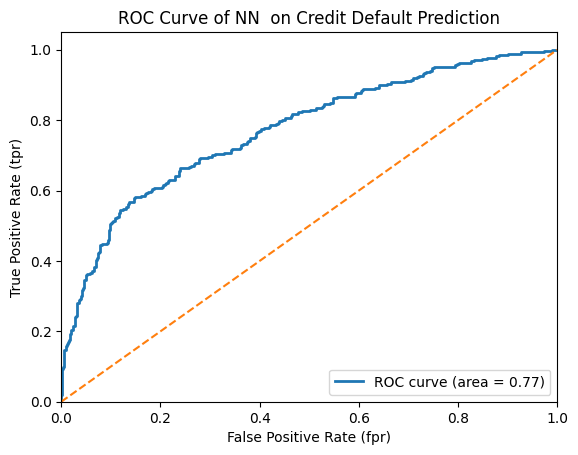

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
### WRITE CODE HERE
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

# compute roc curve and auc
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_preds)
auc_val = metrics.auc(fpr, tpr)
print(f'AUC: {metrics.auc(fpr, tpr)}')

# plot the ROC
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % auc_val)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],linestyle = '--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title('ROC Curve of NN  on Credit Default Prediction')
plt.ylabel('True Positive Rate (tpr)')
plt.xlabel('False Positive Rate (fpr)')
plt.show()

Is the accurancy value impressive for this dataset? Please explain based on the structure of this dataset.

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans- The accuracy value is 0.8 which is similar to the one we got in Excercise 2 using Logistic Regression. Based on the relatively small size of the dataset, this level of accuracy is quite high.

Accuracy scores the general predictive capability of the model by comparing the predicted outcomes to the overall outcomes. This provides an overall view but might not be suitable for imbalanced datasets.
Precision focusses on the accuracy of positive predictions. It gives a sense of how likely a postitive prediction is true. This becomes important when the cost of positive prediction is high such as detection of spam emails where a false positive might be costly.
Recall focusses on the actual positive outcomes and measures the model performance on them. This metric becomes important when we want to reduce the False negative cases as much as possible such as for medical data where mistakenly declaring a diagnosis as negative might be very costly.
F1 score combines precision and recall in a harmonic mean and provides a sense of balance between the two metrics. This helps in evaluating imbalanced datasets.
AUC measures the model's ability to distinguish between positive and negative classes. It provides a sense of how well the model can differentiate between positive and negative classes.

For our dataset, both false positive and false negative can be costly since the former would lead to loss in terms of denying business to profitable customers and the latter would lead to loss by a defaulter. So we need a balanced metric like F1 score that can provide a performance evaluation by balancing between the two positive estimators.


#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
!pip install scikeras
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
# Build create_model function with activation function and learning rate of SGD as parameters
def create_model(activation, learning_rate):

    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate=learning_rate , decay=1e-7, momentum=.9)

    # Create your neural network model
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.

    ### WRITE CODE HERE
    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(units = 64, input_dim = 97, activation = activation ))

    # Drop out layer
    model.add(Dropout(0.3))

    # Continues the process
    model.add(Dense(64, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation= activation))
    model.add(Dropout(0.3))



    # Finally, add a readout layer
    model.add(Dense(1, activation='sigmoid'))


    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'binary_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE
param_grid = {
    'model__learning_rate' : [0.01, 0.001, 0.0001],
    'model__activation' : ['relu', 'tanh'],
    'batch_size': [16,32, 64],
    'epochs': [100, 200, 500]
}

Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search.

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [ ]:
### WRITE CODE HERE
random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_grid,
                                   cv = 5)


In [ ]:
random_search_results = random_search.fit(X_train, y_train) # it may take several hours.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Q8. Print the best model parameters

In [ ]:
### WRITE CODE HERE
print("Best parameters:", random_search_results.best_params_)

Best parameters: {'model__learning_rate': 0.0001, 'model__activation': 'tanh', 'epochs': 500, 'batch_size': 32}


Q9. Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE
best_model = KerasClassifier(build_fn=create_model, verbose=1, **random_search_results.best_params_)
best_model.fit(X_train, y_train)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


88/88 [==============================] - 1s 2ms/step - loss: 0.7190 - accuracy: 0.5238
Epoch 2/500
88/88 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6085
Epoch 3/500
88/88 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6529
Epoch 4/500
88/88 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.6830
Epoch 5/500
88/88 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7236
Epoch 6/500
88/88 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7347
Epoch 7/500
88/88 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7519
Epoch 8/500
88/88 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7418
Epoch 9/500
88/88 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7501
Epoch 10/500
88/88 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7479
Epoch 11/500
88/88 [=

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7c5bff604670>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=500
	model__learning_rate=0.0001
	model__activation=tanh
	class_weight=None
)

Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE
y_pred2 = best_model.predict(X_val)

precision = precision_score(y_val, y_pred2)
recall = recall_score(y_val, y_pred2)
f1 = 2*(precision*recall)/(precision+recall)

print(f'The accuracy is: {accuracy(y_val, y_pred2)}')
print(f'The precision is: {precision}')
print(f'The recall is: {recall}')
print(f'F1 value: {f1}')

38/38 [==============================] - 0s 2ms/step
The accuracy is: 0.8135451505016722
The precision is: 0.632768361581921
The recall is: 0.4148148148148148
F1 value: 0.5011185682326622


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans-We get a marginally better accuracy and precision but the recall and F1 value reduces marginally.
Looking at the suggested best parameters, we see that the best learning rate is same as the one we used in the first NN. This might explain how the parameters are so close.
A larger epoch can allow the model to se more data and potentially improve the accuracy. Hence a greater epoch for the latter NN might explain the marginal improvement in accuracy.
Since the latter network uses tanh as the activation function, this might cause saturation, particularly for extreme values, affecting the gradient during backpropagation. This might indicate the marginal loss in recall.
Smaller batch_size might provide opportunities for the model to improve generalizations and thus get a better recall. This might explain the reduction in recall for the latter NN which uses a larger epoch value of 500.

### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###
    #loading the library
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV

    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'max_iter': [300, 400, 500],
    }

    # First, initialize the classifier
    logistic_model = LogisticRegression(solver = 'liblinear')

    grid_search = GridSearchCV(logistic_model, param_grid = param_grid, cv = 5, scoring = 'recall')

    # Fit on the training data with all sets of parameters.
    grid_search.fit(X_train, y_train)

    best_lr_model = LogisticRegression(solver='liblinear', C = grid_search.best_params_['C'], penalty = grid_search.best_params_['penalty'],
                                       max_iter = grid_search.best_params_['max_iter']).fit(X_train, y_train)

    ######################
    return best_lr_model # Return a logistic model with the best parameters you found

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###

best_logistic_model = logistic_regression_model(X_train, y_train)

In [ ]:
y_logistic_val_preds = best_logistic_model.predict(X_val)
y_logistic_val_preds

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Print accuracy, precision and recall for the predictions.
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate Precision
precision = precision_score(y_val, y_logistic_val_preds)

# Calculate Recall
recall = recall_score(y_val, y_logistic_val_preds)

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_logistic_val_preds)

# Calculate F1 score
F1 = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", F1)


Precision: 0.6685714285714286
Recall: 0.43333333333333335
Accuracy: 0.8235785953177257
F1 Score: 0.5258426966292136


Q13. Plot the ROC curve by giving appropriate names for title and axes.

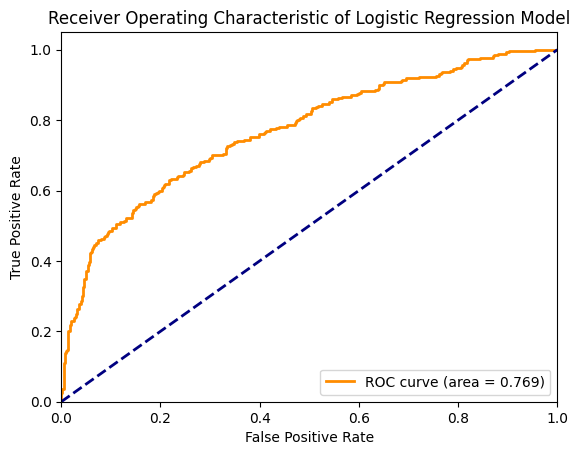

In [ ]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

# compute roc curve and auc
fpr, tpr, thresholds = roc_curve(y_val,  best_logistic_model.predict_proba(X_val)[:,1])
roc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()





Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [ ]:
def random_forest_model(X_train, y_train):

    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state=26) # Please set the random state to be 26

    ### YOUR CODE HERE ###
    from sklearn.model_selection import GridSearchCV

    param_grid = {
        'max_depth': [1, 2, 4, 5],  # You can try different values or set it to None for no maximum depth
        'max_features': ['sqrt', 'log2'],  # Options for the maximum number of features to consider for splitting
        'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        'min_samples_split': [2, 4, 6],  # Minimum number of samples required to split an internal node
        'n_estimators': [50, 100, 200]  # Number of trees in the forest
    }

    grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 3, scoring = 'recall')
    grid_search.fit(X_train, y_train)

    best_rf_model = grid_search.best_estimator_

    return best_rf_model # Return a logistic model with the best parameters you found and random_state=26

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE
best_rf_model = random_forest_model(X_train, y_train)



In [ ]:

y_rf_val_preds = best_rf_model.predict(X_val)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate Precision
precision = precision_score(y_val, y_rf_val_preds)

# Calculate Recall
recall = recall_score(y_val, y_rf_val_preds)

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_rf_val_preds)

# Calculate F1 score
F1 = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", F1)

Precision: 0.6923076923076923
Recall: 0.3333333333333333
Accuracy: 0.8160535117056856
F1 Score: 0.45


Q16. Plot the ROC curve by giving appropriate names for title and axes.

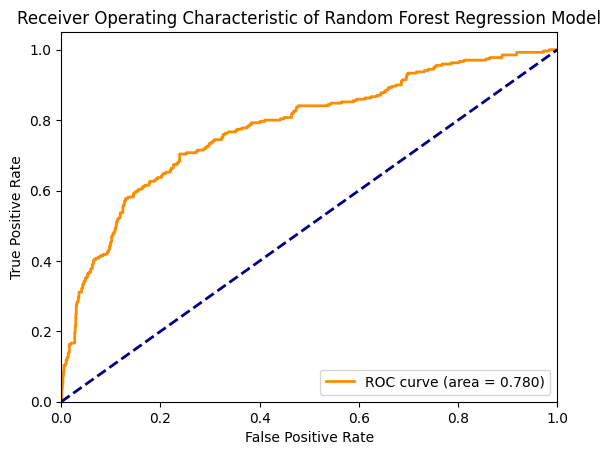

In [ ]:
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

import matplotlib.pyplot as plt

# Compute ROC curve and ROC area

fpr, tpr, thresholds = roc_curve(y_val, best_rf_model.predict_proba(X_val)[:,1])
roc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Random Forest Regression Model')
plt.legend(loc="lower right")
plt.show()

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?


To evaluate which model (Neural Network, Logistic Regression, or Random Forest) performed best in predicting credit default, let's analyze each model based on the provided performance metrics: accuracy, precision, recall, and F1 score.

**Neural Network**
Accuracy (0.8135): Moderately high, indicating a good rate of correct predictions overall.
Precision (0.6328): Moderate, suggesting that when it predicts a default, it's correct about 63% of the time.
Recall (0.4148): Relatively low, meaning it's only capturing about 41% of all actual defaults.
F1 Score (0.5011): Moderate, reflecting a balance between precision and recall, but skewed towards precision.


**Logistic Regression**
Accuracy (0.8236): Slightly higher than the Neural Network, indicating a slightly better overall prediction rate.
Precision (0.6686): Higher than the Neural Network, meaning it's more accurate in predicting defaults when it does.
Recall (0.4333): Also higher, capturing a slightly larger portion of actual defaults.
F1 Score (0.5258): The highest among the three, suggesting a better balance between precision and recall.


**Random Forest**
Accuracy (0.8161): Comparable to the Neural Network, but slightly lower than Logistic Regression.
Precision (0.6923): The highest precision, indicating it's the most accurate when predicting a default.
Recall (0.3333): The lowest, meaning it misses a significant number of actual defaults.
F1 Score (0.45): The lowest, due to the low recall rate.


**Analysis**

Neural Network: Shows a decent balance between all metrics but doesn't excel in any particular area. Its moderate recall rate is a limiting factor.

Logistic Regression: Exhibits the best balance of precision and recall, as evidenced by the highest F1 score. Its higher accuracy also indicates it's slightly better at general prediction tasks for this dataset.

Random Forest: While it has the highest precision, its significantly lower recall greatly affects its F1 score, making it less effective in this context.

**Conclusion**
For predicting credit default, Logistic Regression appears to be the best model among the three. It has the highest accuracy and F1 score, indicating a good balance between precision and recall. While Random Forest is the most precise, its low recall makes it less effective for this particular task. The Neural Network, though reasonably balanced, doesn't match the Logistic Regression's performance. The choice of the best model can also depend on the specific requirements of the prediction task, such as whether precision or recall is more important




Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
### YOUR CODE HERE ###
# y_pred =
best_logistic_model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,



---



### Individual student contribution

Everyone did everything, It was a team effort

